<a href="https://colab.research.google.com/github/paulmorales7/Vehicle-Demand-Sales-EDA/blob/main/Vehicle_Demand_and_Sales_in_the_Automobile_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumer Preferences: Analyzing Factors Influencing Vehicle Demand and Sales in the Automobile Industry

###  Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


### 1. Load the Data

In [ ]:

# Load the data
car_df = pd.read_csv("Car_sales.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
car_df.head()


First few rows of the dataset:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### i. Load Data Shape

In [ ]:
car_df.shape

(157, 16)

### ii.structure and summary of the dataset

In [ ]:

# Check the structure and summary of the dataset
print("\nDataset structure and summary:")
print(car_df.info())


Dataset structure and summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_pe

## 2. Data Cleaning

### i. Check for missing values

In [ ]:
# Check for missing values
missing_values = car_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Only display columns with missing values



Missing values in each column:
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64


### ii.Check for duplicates

In [ ]:
# Check for duplicates
duplicates = car_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


### iii. Sorting Missing values

In [ ]:
# Fill missing values for numerical columns with median
car_df["__year_resale_value"].fillna(car_df["__year_resale_value"].median(), inplace=True)
car_df["Price_in_thousands"].fillna(car_df["Price_in_thousands"].median(), inplace=True)
car_df["Engine_size"].fillna(car_df["Engine_size"].median(), inplace=True)
car_df["Horsepower"].fillna(car_df["Horsepower"].median(), inplace=True)
car_df["Wheelbase"].fillna(car_df["Wheelbase"].median(), inplace=True)
car_df["Width"].fillna(car_df["Width"].median(), inplace=True)
car_df["Length"].fillna(car_df["Length"].median(), inplace=True)
car_df["Curb_weight"].fillna(car_df["Curb_weight"].median(), inplace=True)
car_df["Fuel_capacity"].fillna(car_df["Fuel_capacity"].median(), inplace=True)
car_df["Fuel_efficiency"].fillna(car_df["Fuel_efficiency"].median(), inplace=True)
car_df["Power_perf_factor"].fillna(car_df["Power_perf_factor"].median(), inplace=True)

# Fill missing values for categorical columns with mode
car_df["Manufacturer"].fillna(car_df["Manufacturer"].mode()[0], inplace=True)
car_df["Model"].fillna(car_df["Model"].mode()[0], inplace=True)
car_df["Vehicle_type"].fillna(car_df["Vehicle_type"].mode()[0], inplace=True)
car_df["Latest_Launch"].fillna(car_df["Latest_Launch"].mode()[0], inplace=True)


### iv.Rechecking the  missing values

In [ ]:
# Last check for missing values
missing_values = car_df.isnull().sum()
print(missing_values)


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

### 3.1.Summary Statistics

In [ ]:
car_df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,17.180318,27.332261,3.060510,185.894904,107.484076,71.146178,187.347134,3.377567,17.947134,23.847134,76.979735
std,68.029422,10.178562,14.268713,1.041311,56.522319,7.616872,3.441124,13.388708,0.626460,3.875905,4.241380,24.987338
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### ii. Identify Outliers Using Box Plots

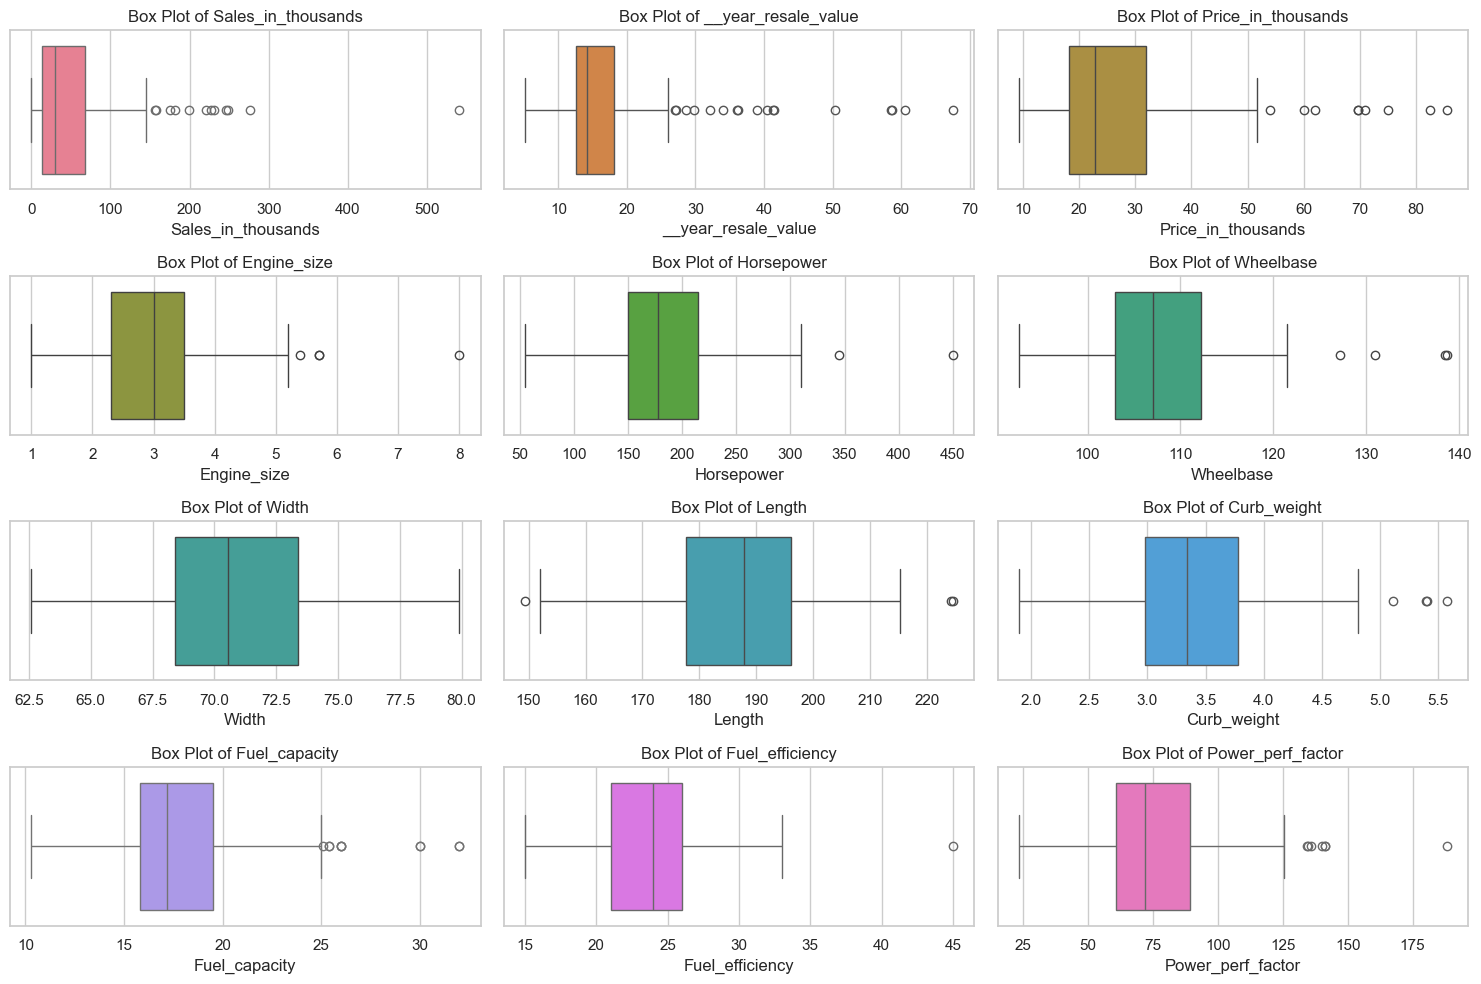

In [ ]:
# Set the visualisation style
sns.set(style="whitegrid")

# Identify numeric columns in the DataFrame
numeric_columns = car_df.select_dtypes(include=['float64', 'int64']).columns

# Define a color palette
colors = sns.color_palette("husl", len(numeric_columns))  # Using the Husl color palette

# Create box plots for identifying outliers in numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=car_df[column], color=colors[i-1])  # Assign a different color for each box plot
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

### 3.2. Data Visualizations

## 3.2.1. Univariate Analysis

### i. Distribution of Sales

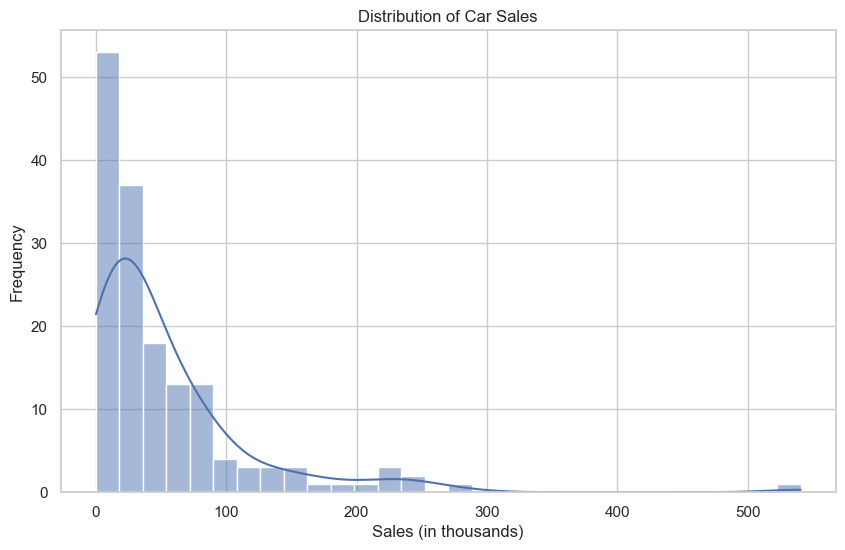

In [ ]:
# Set the visualization style
sns.set(style="whitegrid")

# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(car_df['Sales_in_thousands'], bins=30, kde=True)
plt.title('Distribution of Car Sales')
plt.xlabel('Sales (in thousands)')
plt.ylabel('Frequency')
plt.show()


### ii. Distribution of Car prices

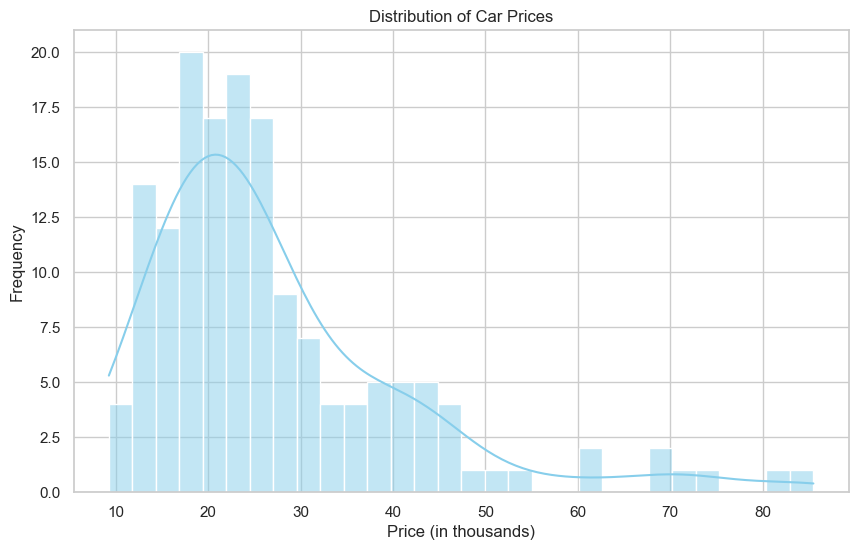

In [ ]:
# Set the visualization style
sns.set(style="whitegrid")

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(car_df['Price_in_thousands'], bins=30, kde=True, color='skyblue')  # Change color here
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()


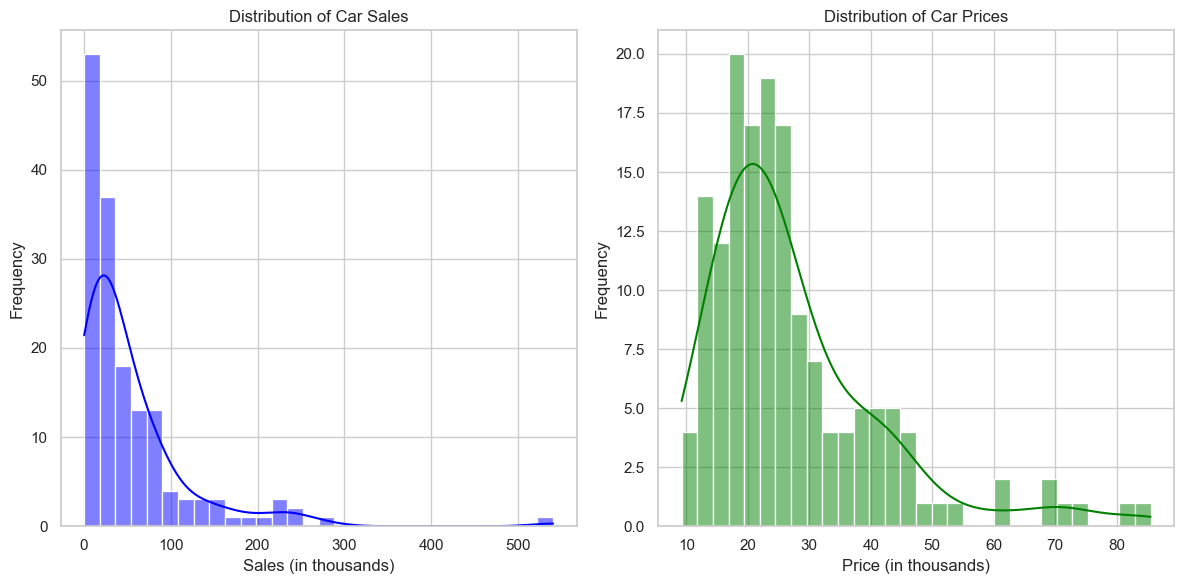

In [ ]:
# Set the visualization style
sns.set(style="whitegrid")

# Set up figure size
plt.figure(figsize=(12, 6))

# Plot Distribution of Sales
plt.subplot(1, 2, 1)  # Set up a subplot for Sales
sns.histplot(car_df['Sales_in_thousands'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Sales')
plt.xlabel('Sales (in thousands)')
plt.ylabel('Frequency')

# Plot Distribution of Price
plt.subplot(1, 2, 2)  # Set up a subplot for Price
sns.histplot(car_df['Price_in_thousands'], bins=30, kde=True, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


### iii. Distribution of Vehicle types

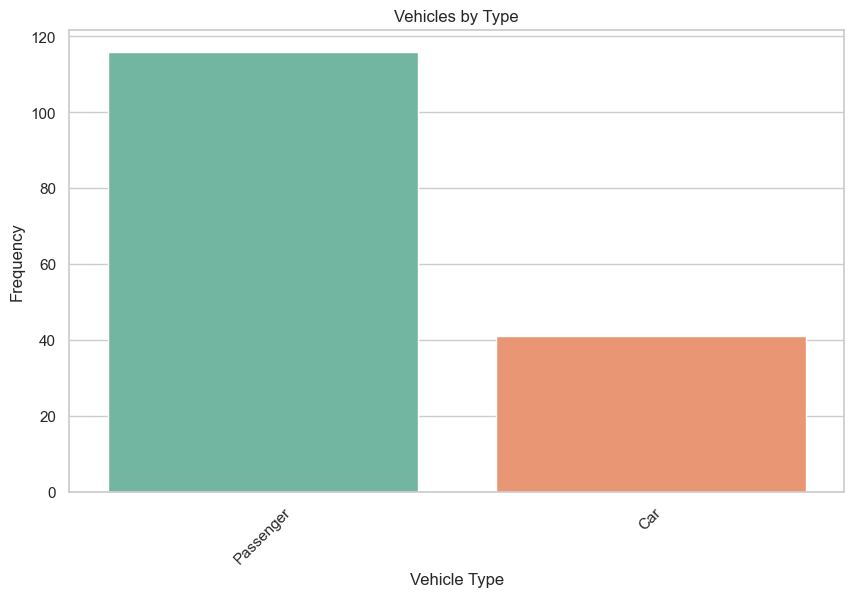

In [ ]:
# Count plot for Vehicle Type
plt.figure(figsize=(10, 6))
sns.countplot(data=car_df, x='Vehicle_type', palette='Set2')
plt.title('Vehicles by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## 3.2.2. Bivariate Analysis

### iv. Comparative Analysis of Numeric Factors by Vehicle Type

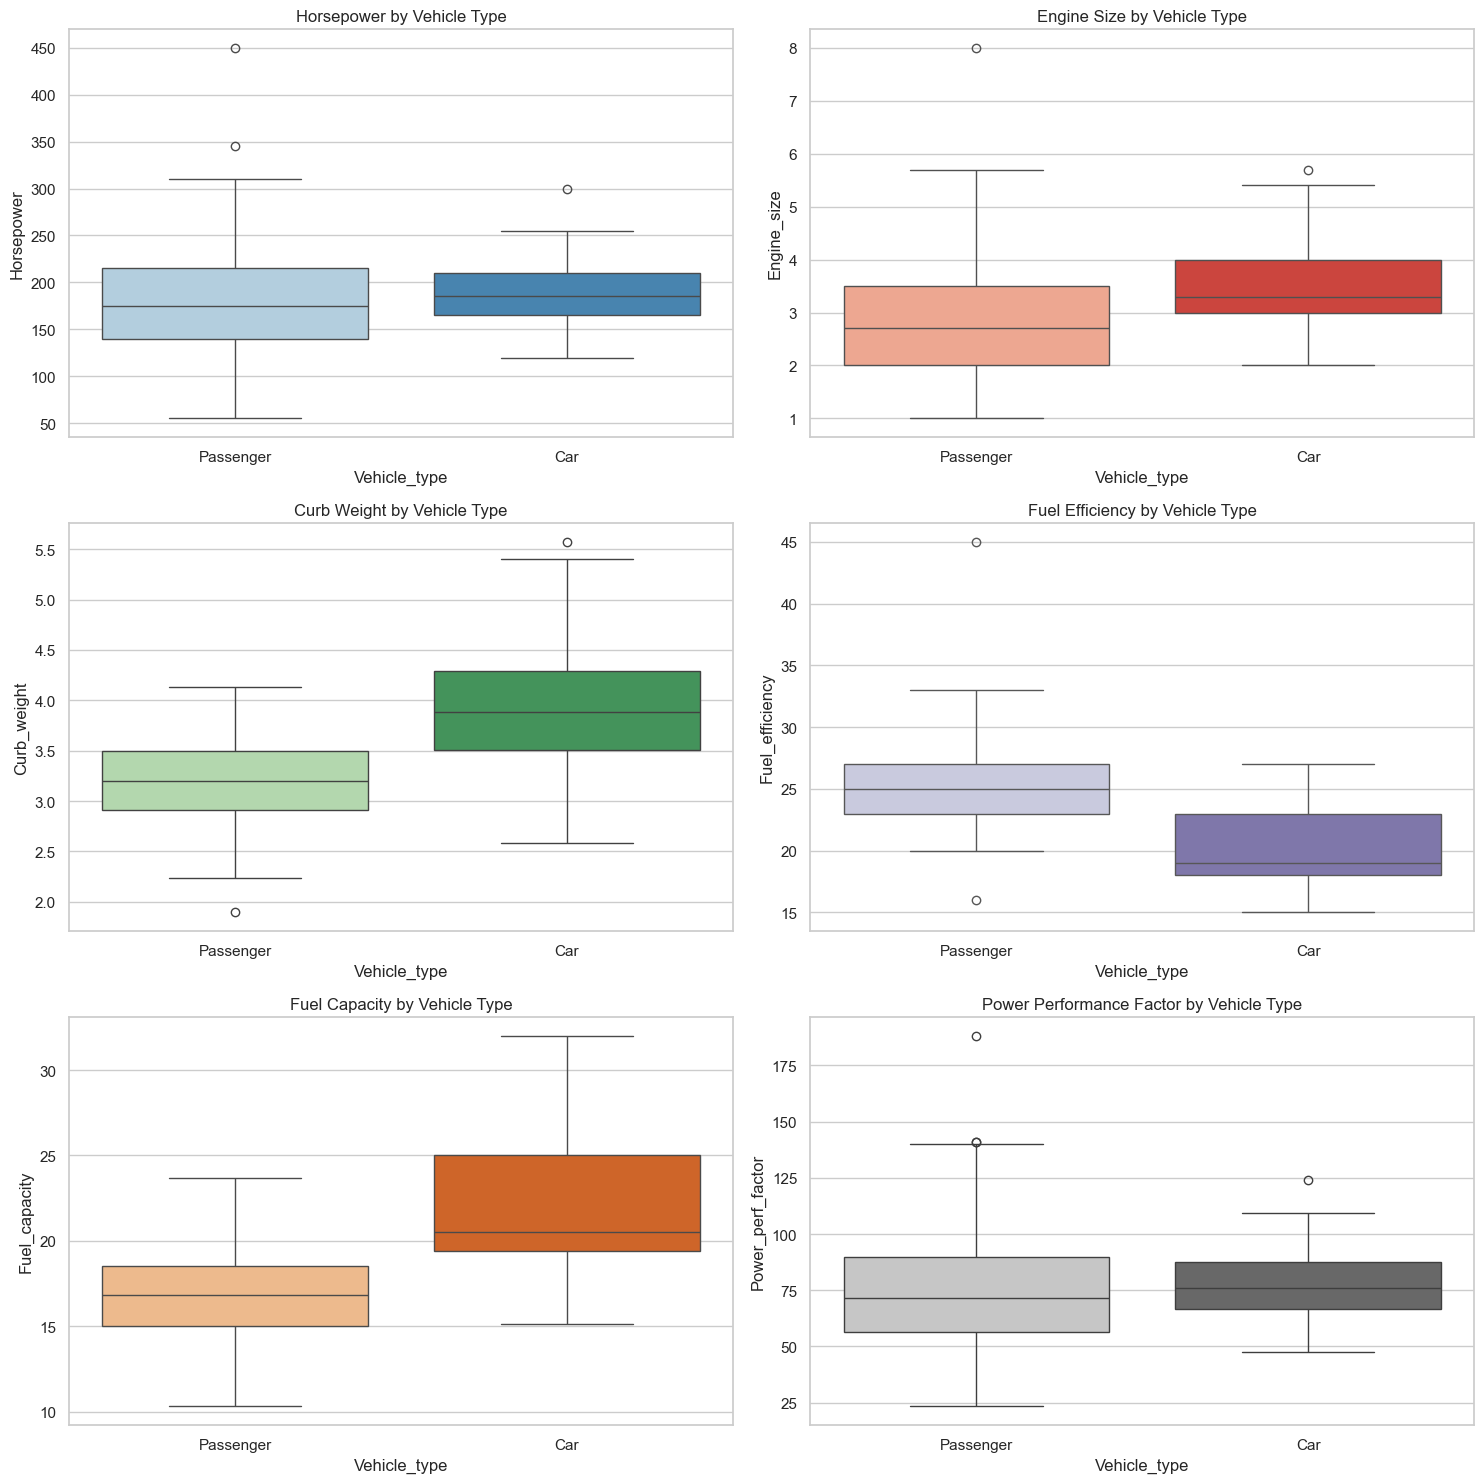

In [ ]:

#Use box plots to compare distributions of multiple numeric variables across different vehicle types

# Create a list of colors for each box plot
color_palettes = ['Blues', 'Reds', 'Greens', 'Purples', 'Oranges', 'Greys']

# Create box plots for multiple numeric variables by Vehicle Type
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(ax=axes[0, 0], x='Vehicle_type', y='Horsepower', data=car_df, palette=color_palettes[0])
sns.boxplot(ax=axes[0, 1], x='Vehicle_type', y='Engine_size', data=car_df, palette=color_palettes[1])
sns.boxplot(ax=axes[1, 0], x='Vehicle_type', y='Curb_weight', data=car_df, palette=color_palettes[2])
sns.boxplot(ax=axes[1, 1], x='Vehicle_type', y='Fuel_efficiency', data=car_df, palette=color_palettes[3])
sns.boxplot(ax=axes[2, 0], x='Vehicle_type', y='Fuel_capacity', data=car_df, palette=color_palettes[4])
sns.boxplot(ax=axes[2, 1], x='Vehicle_type', y='Power_perf_factor', data=car_df, palette=color_palettes[5])

axes[0, 0].set_title('Horsepower by Vehicle Type')
axes[0, 1].set_title('Engine Size by Vehicle Type')
axes[1, 0].set_title('Curb Weight by Vehicle Type')
axes[1, 1].set_title('Fuel Efficiency by Vehicle Type')
axes[2, 0].set_title('Fuel Capacity by Vehicle Type')
axes[2, 1].set_title('Power Performance Factor by Vehicle Type')

plt.tight_layout()
plt.show()

### v. Fuel Efficiency by Vehicle

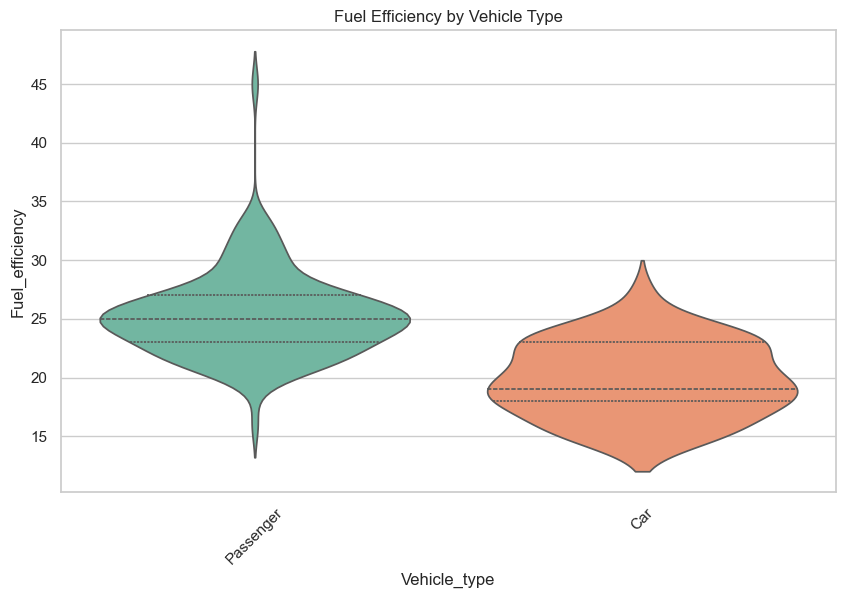

In [ ]:
# Violin plot for Fuel Efficiency by Vehicle
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vehicle_type', y='Fuel_efficiency', data=car_df, inner='quartile', palette='Set2')
plt.title('Fuel Efficiency by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

### vi. Price vs. Sales Relationship

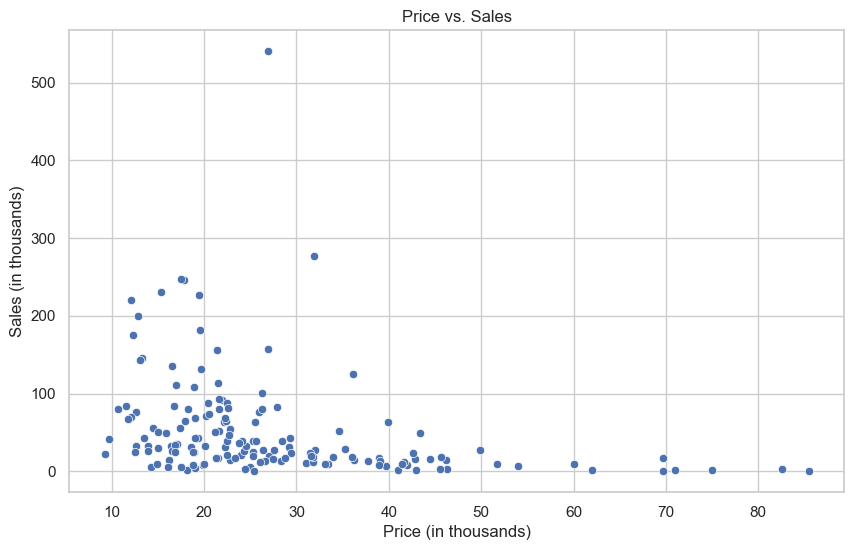

In [ ]:
# Scatter plot of Price vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_in_thousands', y='Sales_in_thousands', data=car_df)
plt.title('Price vs. Sales')
plt.xlabel('Price (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

## 3.2.3 Multivariate Analysis

### vii.Horsepower vs. Fuel Efficiency

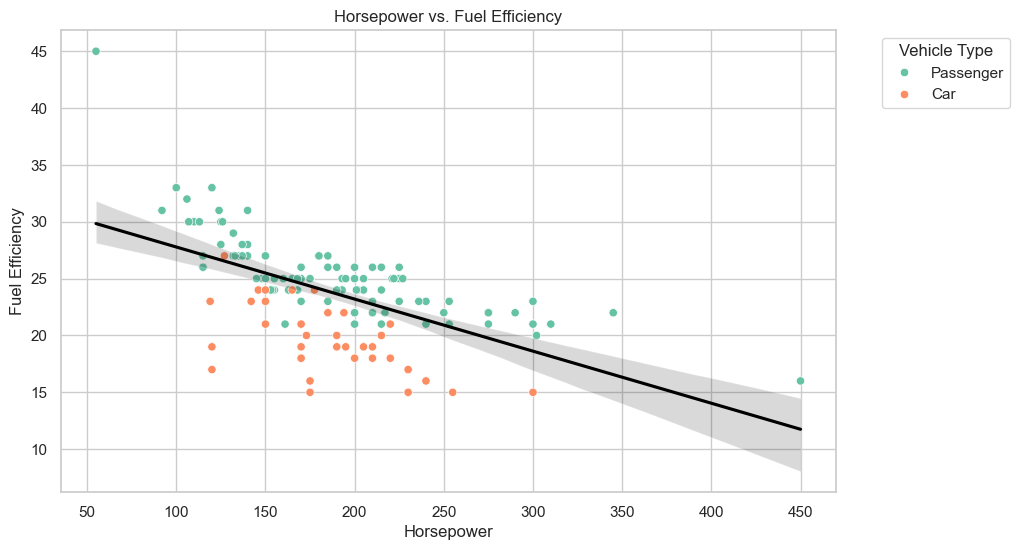

In [ ]:
# Scatter plot for Horsepower vs. Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_df, x='Horsepower', y='Fuel_efficiency', hue='Vehicle_type', palette='Set2')
sns.regplot(data=car_df, x='Horsepower', y='Fuel_efficiency', scatter=False, color='black')
plt.title('Horsepower vs. Fuel Efficiency')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Viii. Engine Size and Horsepower Relationship

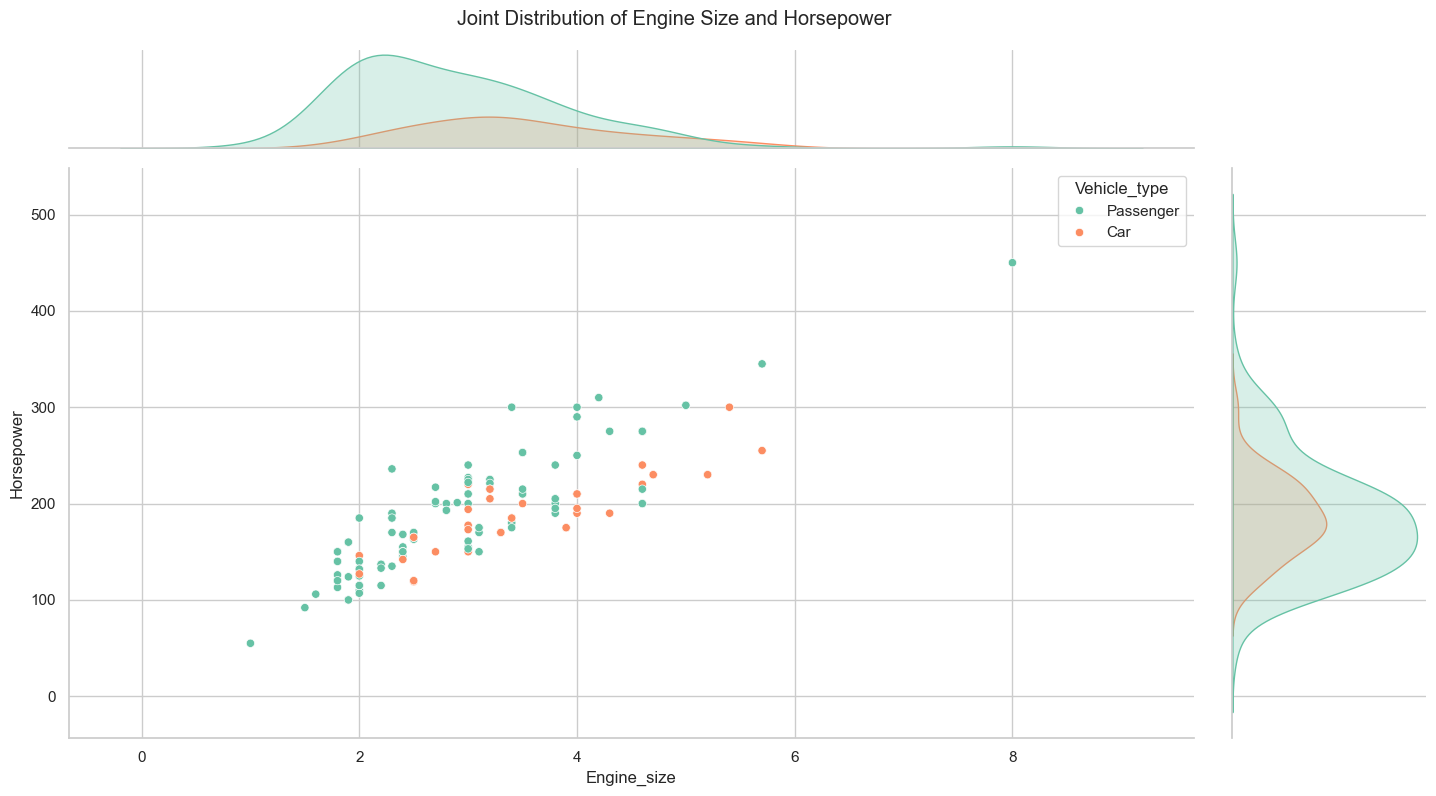

In [ ]:
# Set the visualization style
sns.set(style="whitegrid")

# Create a joint plot for Engine Size and Horsepower
g = sns.jointplot(data=car_df, x='Engine_size', y='Horsepower', hue='Vehicle_type', palette='Set2', kind='scatter')

# Set the figure size
g.fig.set_size_inches(16, 8)

# Add a title
plt.suptitle('Joint Distribution of Engine Size and Horsepower', y=1.02)

# Show the plot
plt.show()

### ix. Pairwise Relationships between different factors

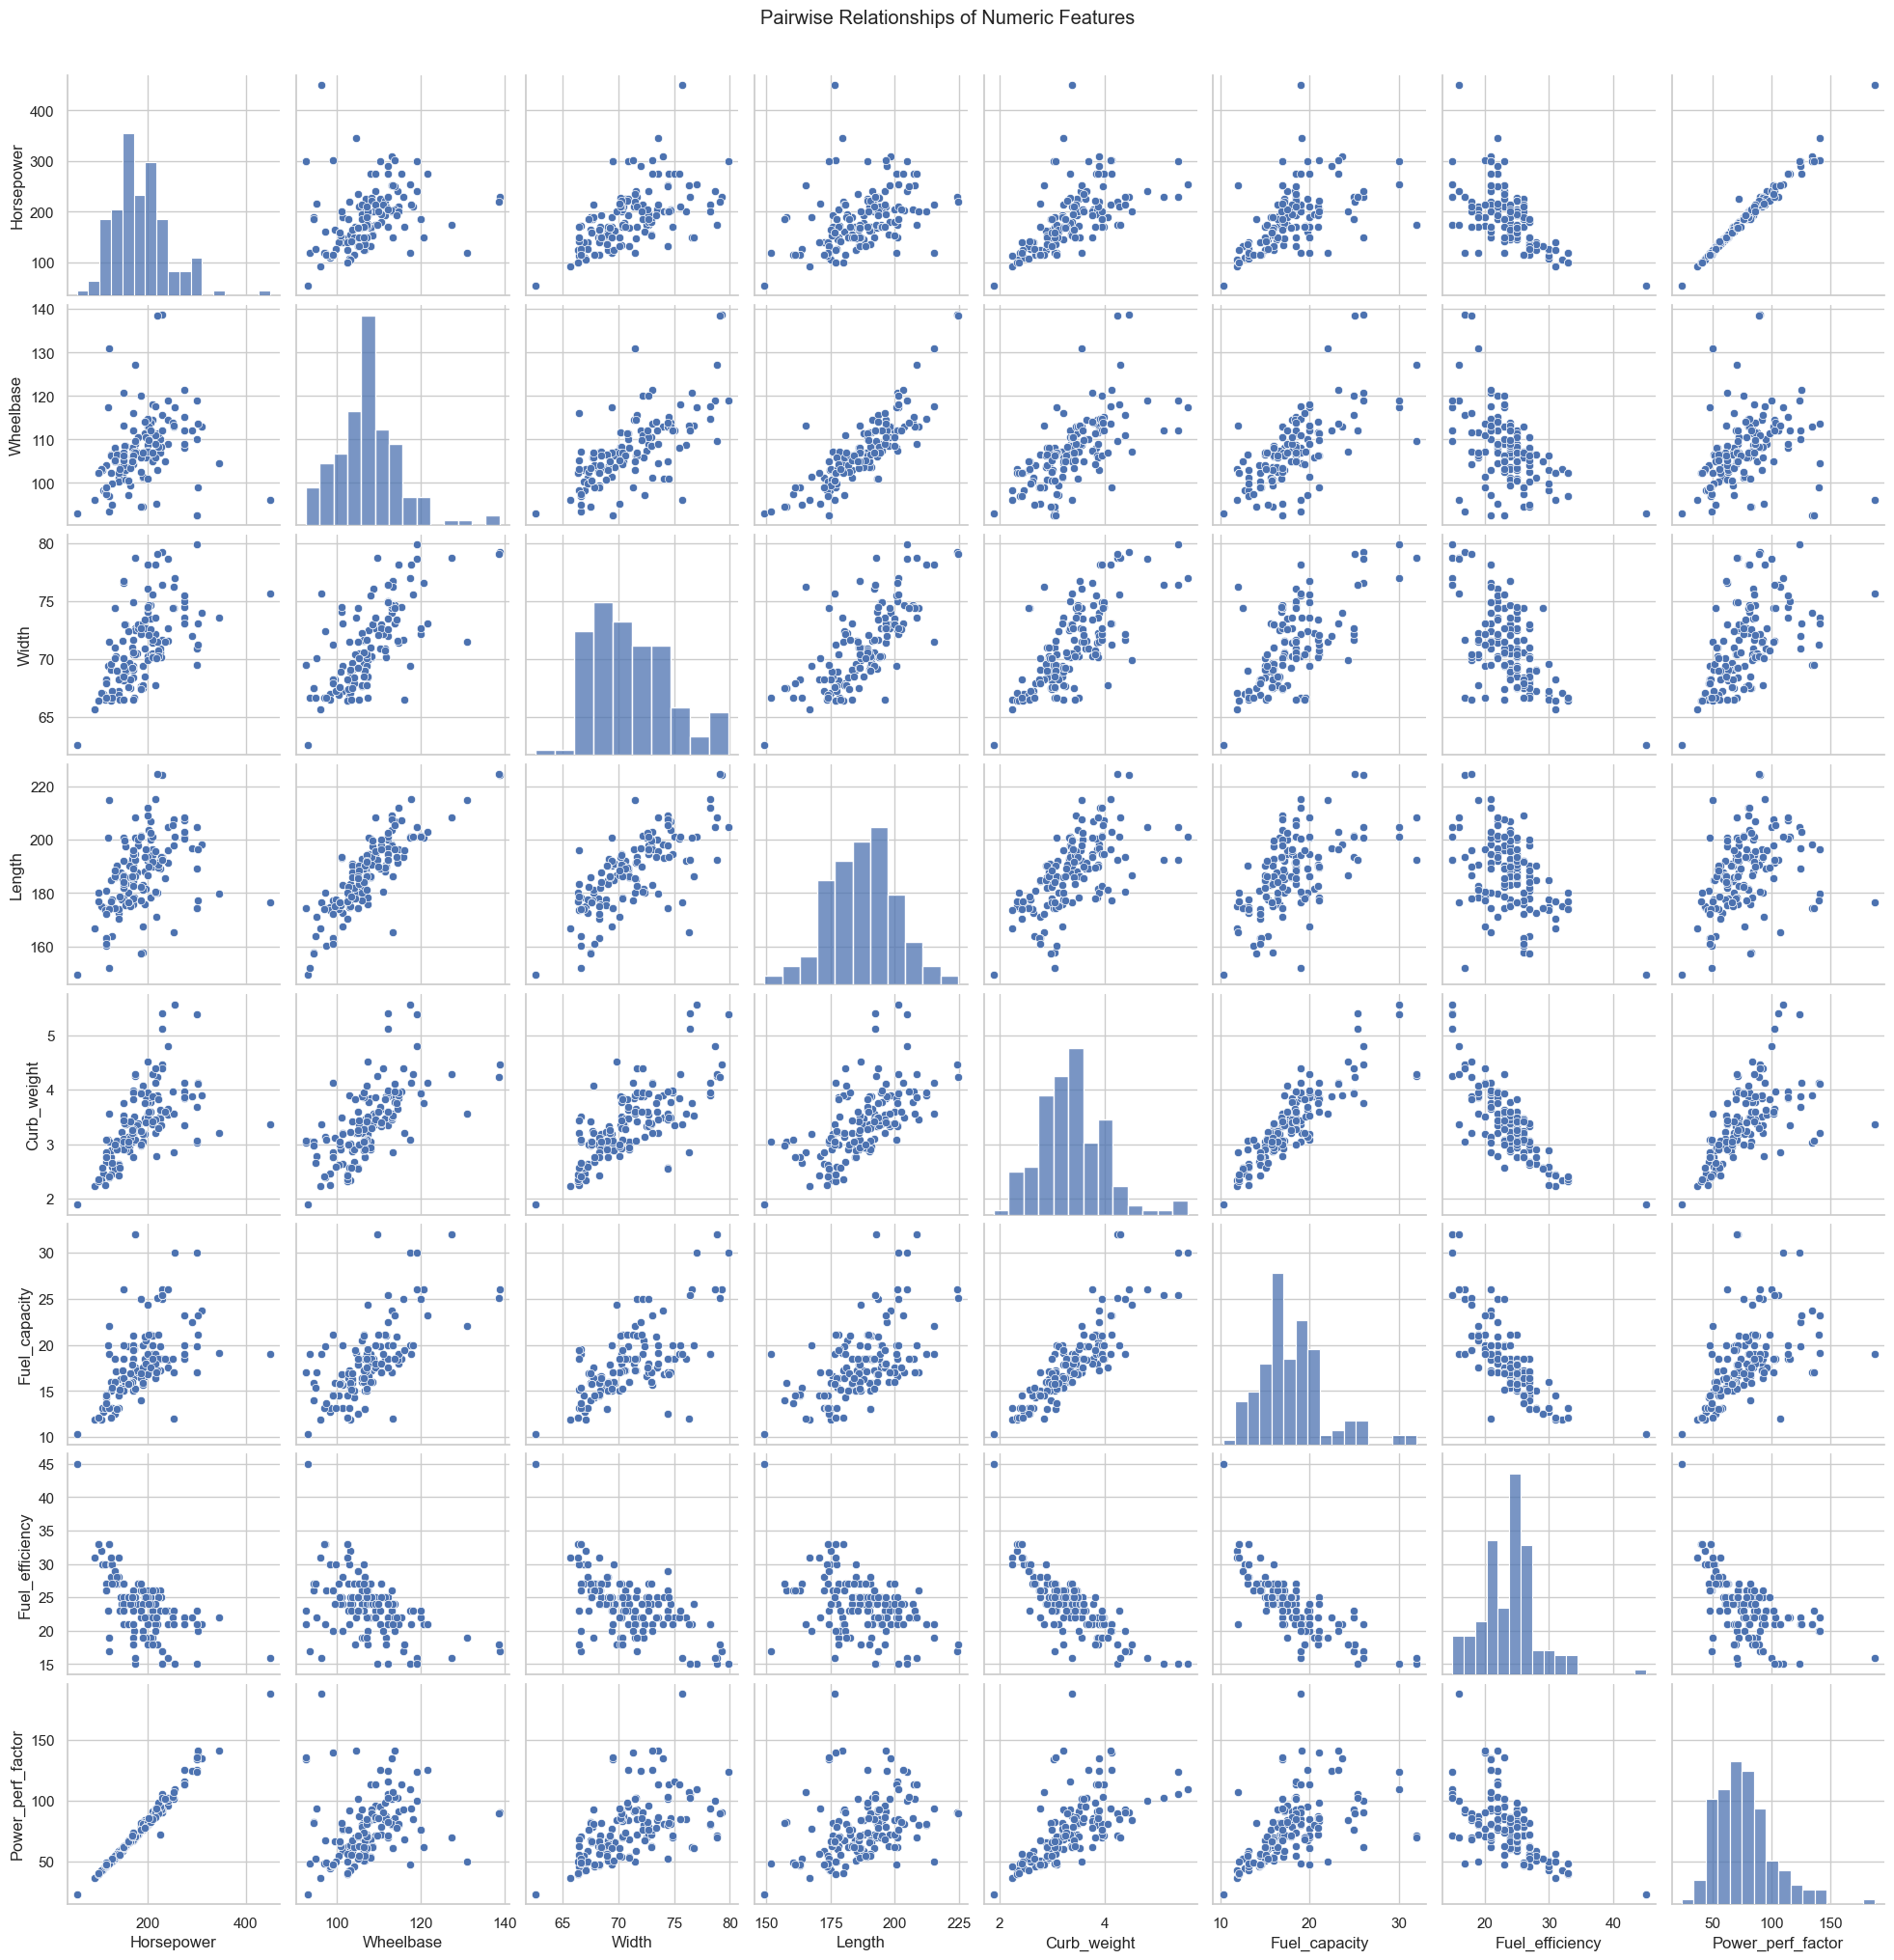

In [ ]:
# Pairplot for numeric variables
numeric_columns = ['Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
                   'Fuel_efficiency', 'Power_perf_factor']

sns.pairplot(car_df[numeric_columns])
plt.suptitle('Pairwise Relationships of Numeric Features', y=1.02)
plt.show()


### x.Correlation Heatmap of Numeric Variables

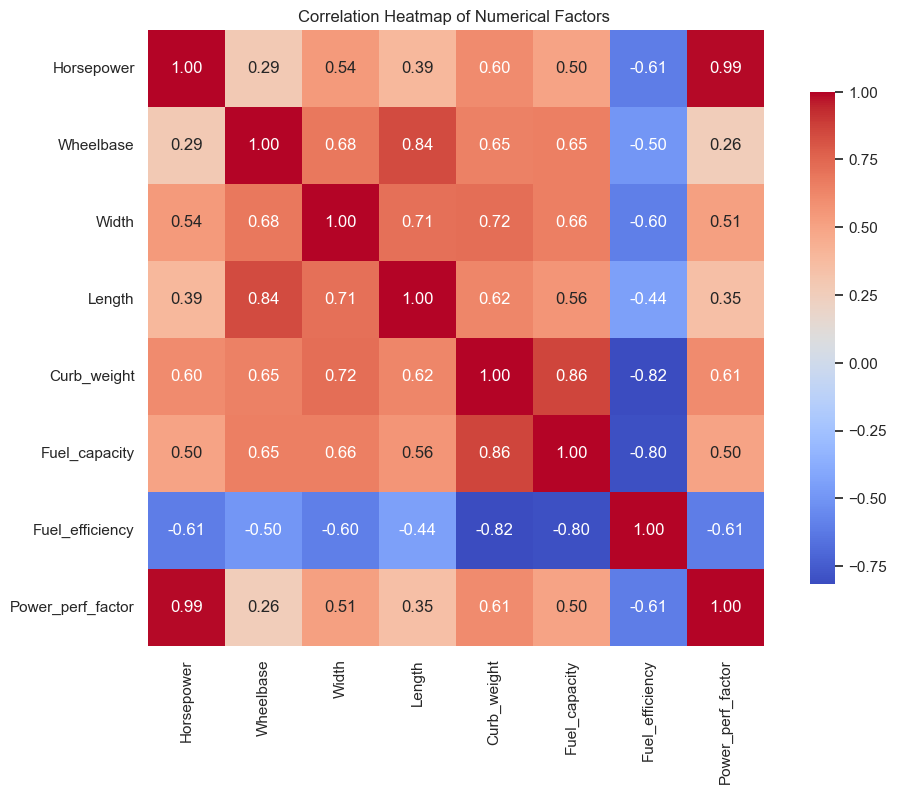

In [ ]:
# Specify the numeric columns
numeric_columns = ['Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
                   'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

# Create a correlation heatmap for numeric variables
plt.figure(figsize=(12, 8))
correlation = car_df[numeric_columns].corr()  # Calculate correlation for numeric columns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Factors ')
plt.show()


### xi. Vehicle Models: Price vs. Sales

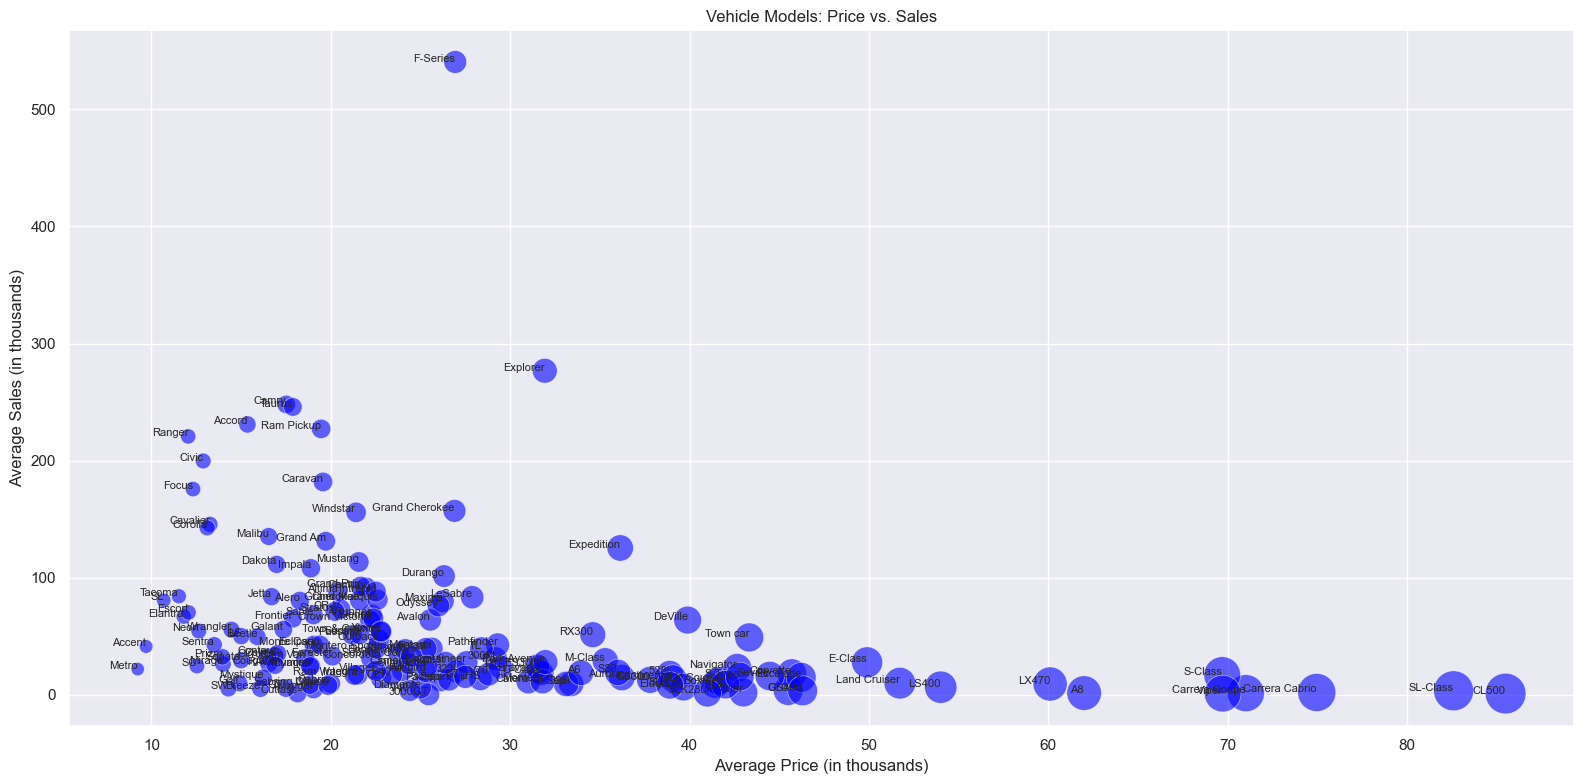

In [ ]:
# Set the visualization style
sns.set(style="darkgrid")

# Calculate the average sales and prices for each model
average_sales_prices = car_df.groupby('Model').agg({'Sales_in_thousands': 'mean', 'Price_in_thousands': 'mean'}).reset_index()

# Create a bubble plot
plt.figure(figsize=(16, 8))
bubble = plt.scatter(
    x=average_sales_prices['Price_in_thousands'],
    y=average_sales_prices['Sales_in_thousands'],
    s=average_sales_prices['Price_in_thousands'] * 10,  # Scale bubble size for visibility
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5,
    color='blue'
)

# Add labels and title
plt.title('Vehicle Models: Price vs. Sales')
plt.xlabel('Average Price (in thousands)')
plt.ylabel('Average Sales (in thousands)')

# Add model names to the bubbles
for i in range(len(average_sales_prices)):
    plt.text(
        average_sales_prices['Price_in_thousands'].iloc[i],
        average_sales_prices['Sales_in_thousands'].iloc[i],
        average_sales_prices['Model'].iloc[i],
        fontsize=8,
        ha='right'
    )

plt.tight_layout()
plt.show()
